In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [76]:
t = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
t

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [77]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [78]:
t1= t.drop(['Id','Model','Mfg_Month','Mfg_Year','Mfr_Guarantee','Fuel_Type','Met_Color','Color','Automatic','Cylinders',"BOVAG_Guarantee","Guarantee_Period", "ABS","Airbag_1","Airbag_2","Airco","Automatic_airco","Boardcomputer",'CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [79]:
t1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [80]:
t1.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [81]:
tc = t1.rename({'Age_08_04':'Age','cc' :'CC','Quarterly_Tax':'QuaTax'},axis=1)
tc

,Price,Age,KM,HP,CC,Doors,Gears,QuaTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [82]:
tc[tc.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QuaTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [83]:
tc2=tc.drop_duplicates().reset_index(drop=True)
tc2

,Price,Age,KM,HP,CC,Doors,Gears,QuaTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [84]:
tc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QuaTax  1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [85]:
tc2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QuaTax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [86]:
tc2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QuaTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuaTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [ ]:
sn.set_style(style = 'darkgrid')
sn.pairplot(tc2)

In [ ]:
model= smf.ols('Price	 ~ Age+KM+HP+CC+Doors+Gears+QuaTax+Weight',data=tc2).fit()
model.summary()

In [ ]:
model.params
model.pvalues ,model.tvalues

In [ ]:
mdl_cc = smf.ols('Price~ CC',data=tc2).fit()
mdl_cc.summary()

In [ ]:
mdl_doors = smf.ols('Price ~ Doors',data=tc2).fit()
mdl_doors.summary()

In [ ]:
mdl_cc_doors = smf.ols('Price~ CC+Doors',data=tc2).fit()
mdl_cc_doors.summary()

In [ ]:
rsqrt_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QuaTax+Weight',data=tc2).fit().rsquared
vif_age=1/(1-rsqrt_age)
vif_age

In [ ]:
rsqrt_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QuaTax+Weight',data=tc2).fit().rsquared
vif_KM=1/(1-rsqrt_KM)
vif_KM

In [ ]:
rsqrt_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QuaTax+Weight',data=tc2).fit().rsquared
vif_HP=1/(1-rsqrt_HP)
vif_HP

In [ ]:
rsqrt_CC=smf.ols('CC~Age+HP+KM+Doors+Gears+QuaTax+Weight',data=tc2).fit().rsquared
vif_CC=1/(1-rsqrt_CC)
vif_CC

In [ ]:
rsqrt_doors=smf.ols('Doors~Age+HP+CC+KM+Gears+QuaTax+Weight',data=tc2).fit().rsquared
vif_doors=1/(1-rsqrt_doors)
vif_doors
rsqrt_Gears=smf.ols('Gears~Age+HP+CC+Doors+KM+QuaTax+Weight',data=tc2).fit().rsquared
vif_Gears=1/(1-rsqrt_Gears)
vif_Gears
rsqrt_QuaTax=smf.ols('QuaTax~Age+HP+KM+CC+Doors+Gears+Weight',data=tc2).fit().rsquared
vif_QuaTax=1/(1-rsqrt_QuaTax)
vif_QuaTax
rsqrt_Weight=smf.ols('Weight~Age+HP+KM+CC+Doors+Gears+QuaTax',data=tc2).fit().rsquared
vif_Weight=1/(1-rsqrt_Weight)
vif_Weight

In [ ]:
data = {'variables':['Age','KM','HP','CC','Doors','Gears','QuaTax','Weight'],'vif_values':[vif_age,vif_KM,vif_HP,vif_CC,vif_doors,vif_Gears,vif_QuaTax,vif_Weight]}
vif_table = pd.DataFrame(data)
vif_table

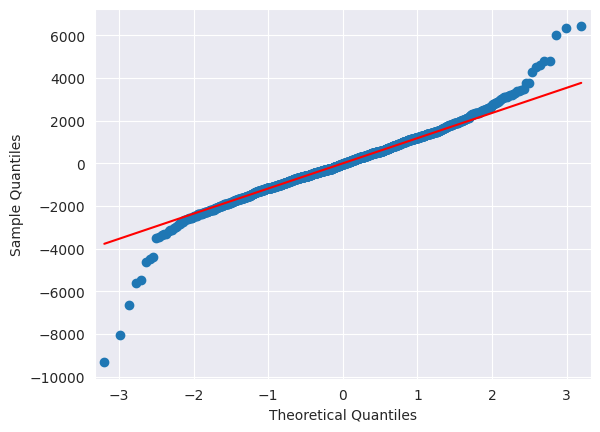

In [ ]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')

In [ ]:
np.where(model.resid > 6000)

(array([109, 146, 522]),)

In [ ]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/(vals.std())

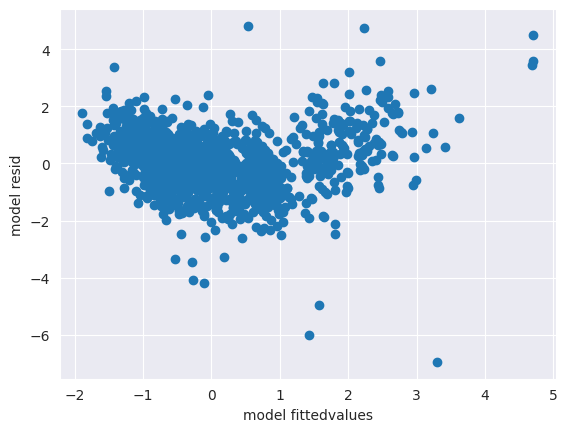

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.xlabel('model fittedvalues')
plt.ylabel('model resid')
plt.show()

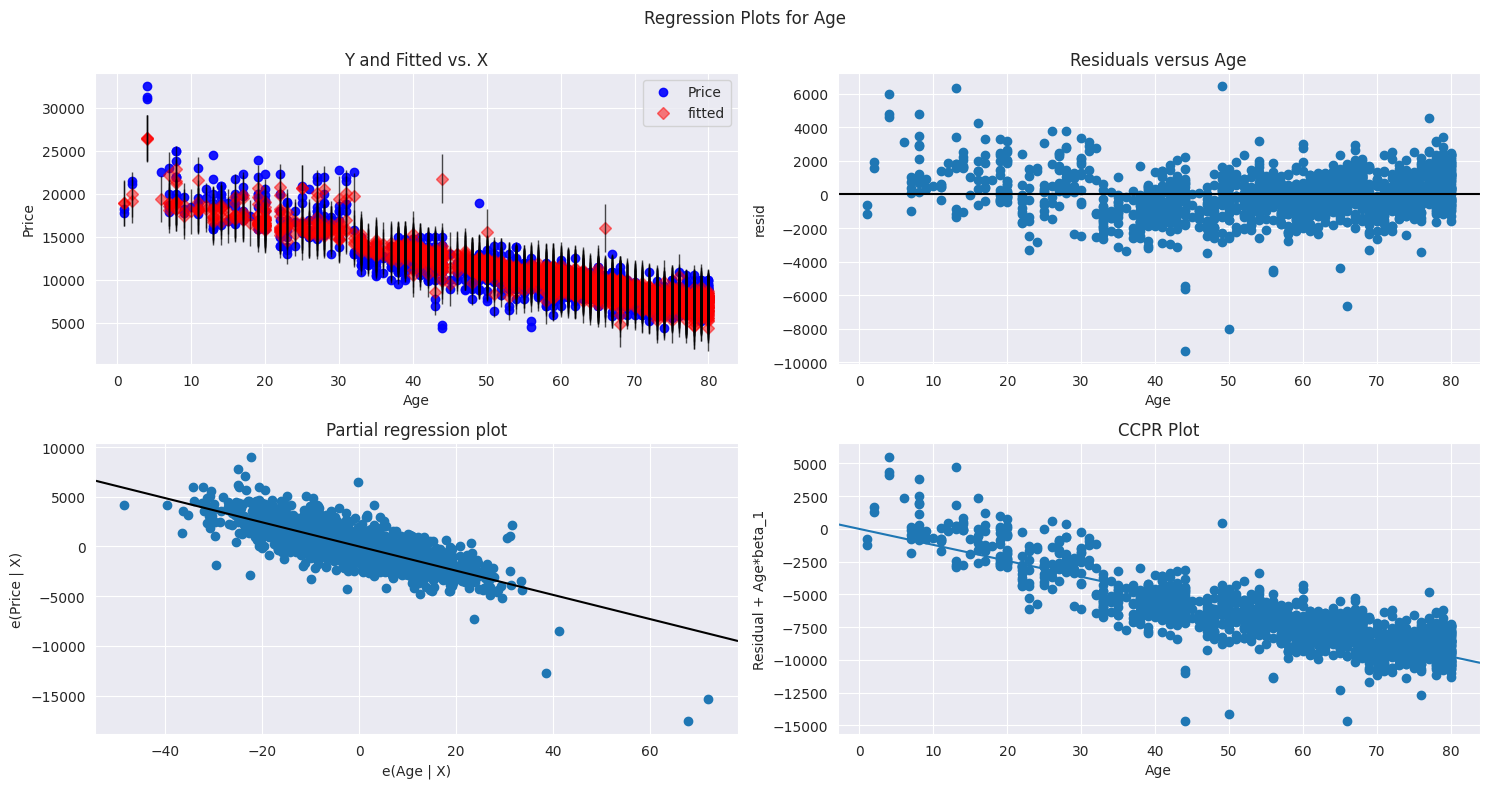

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

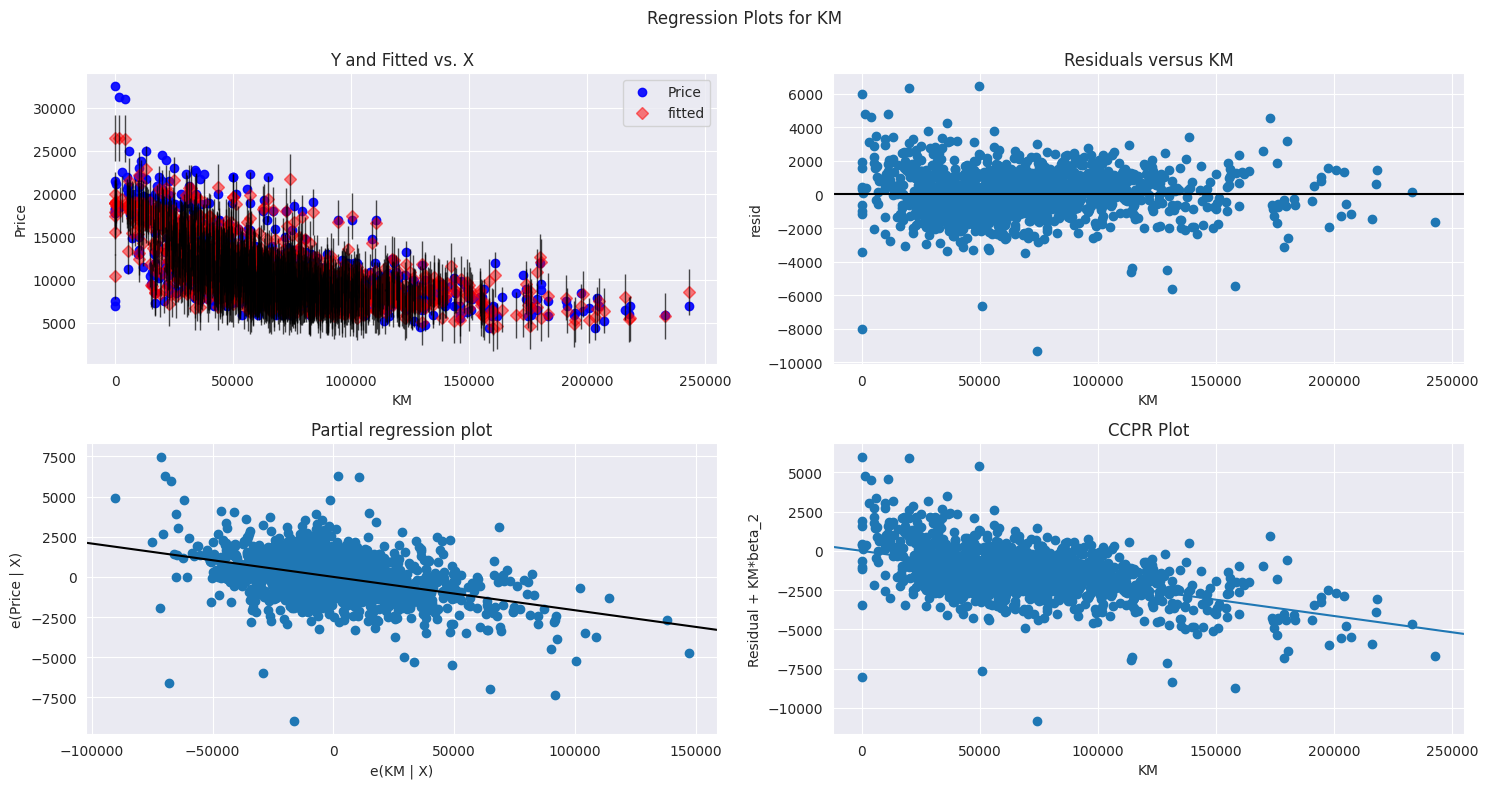

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [ ]:

fig = plt.figure(figsize=(15,9))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

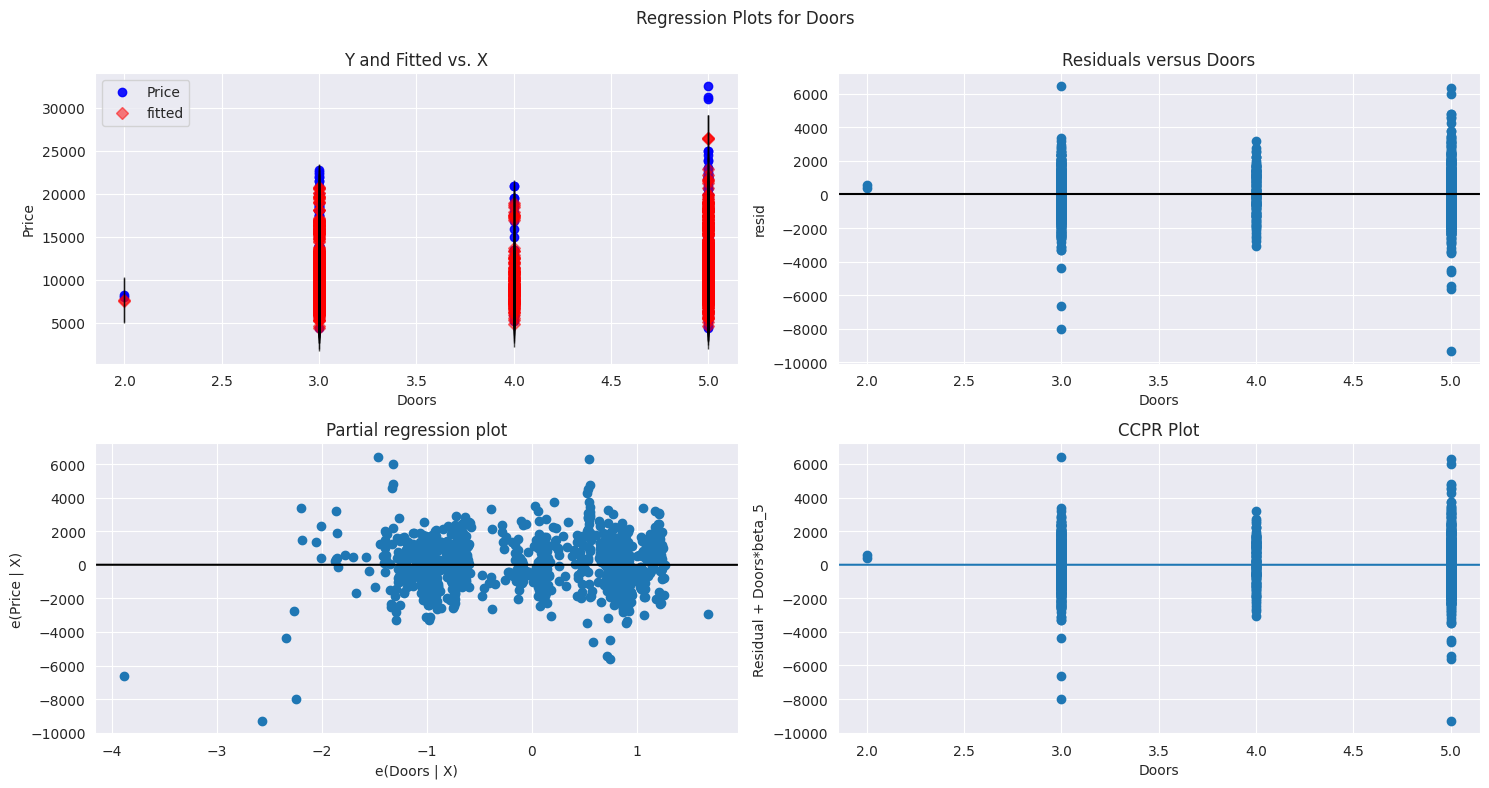

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

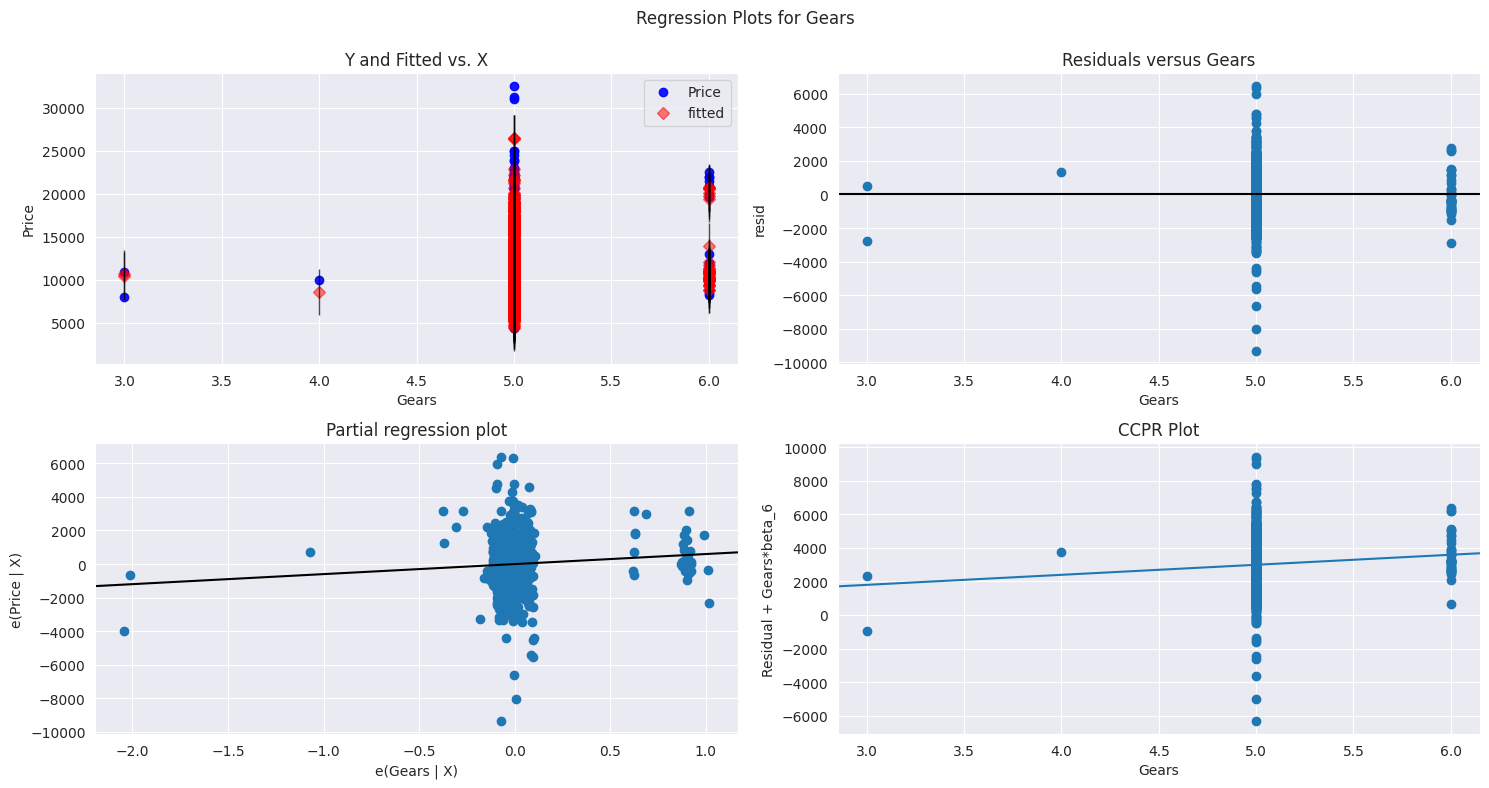

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

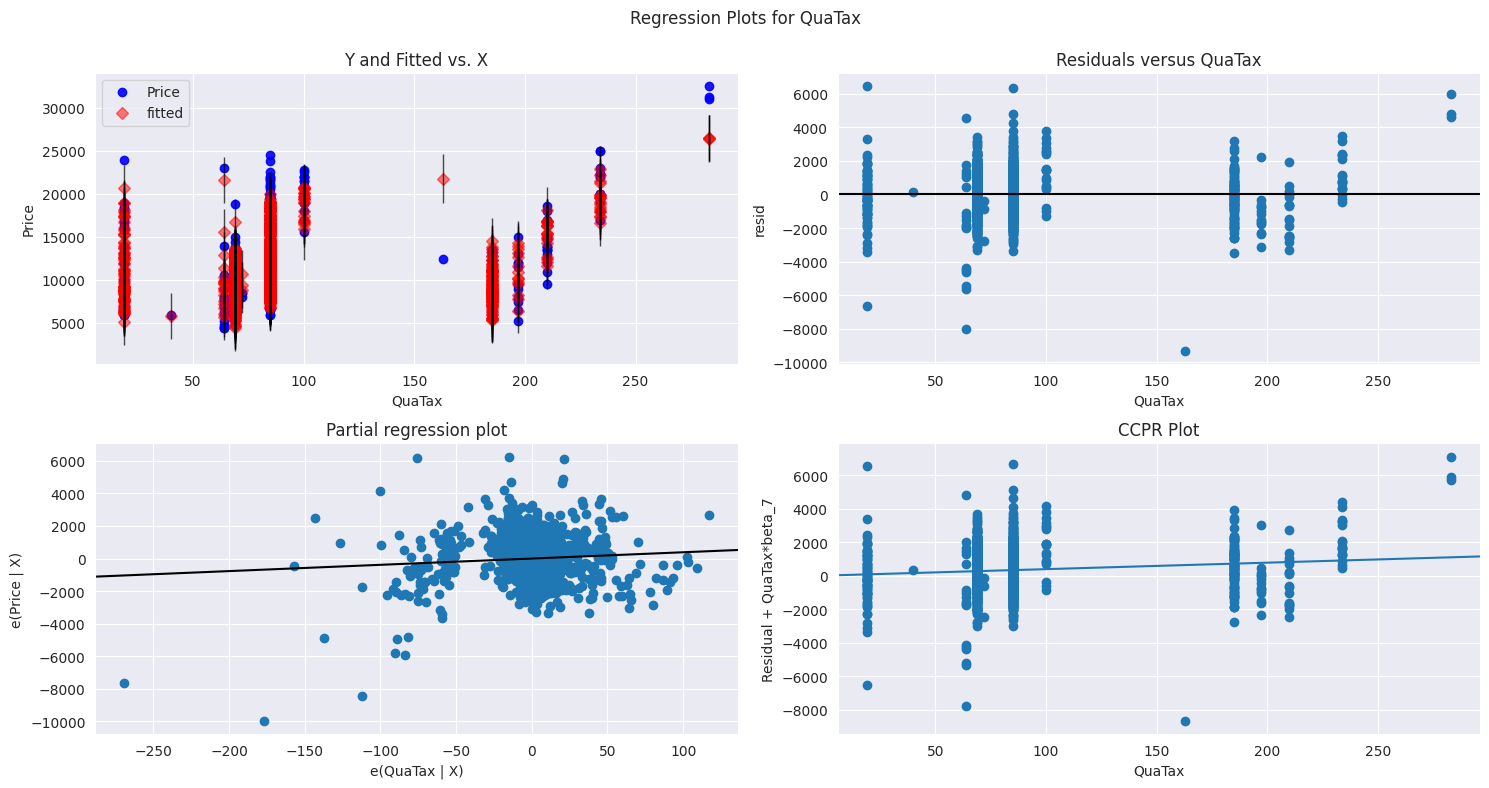

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QuaTax", fig=fig)
plt.show()

In [ ]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
fig = plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(tc2)),np.around(c,3))

In [ ]:
np.argmax(c),np.max(c)

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
k=tc2.shape[1]
n=tc2.shape[0]
leverage_cutoff =(3*(k+1))/n
leverage_cutoff

In [ ]:
tc2[tc2.index.isin([80])]

In [ ]:
tc2

In [ ]:
tc3=tc2.drop([80],axis=0)
tc3

In [ ]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QuaTax+Weight',data=tc2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    tc2=tc2.drop(tc2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    tc2
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=tc2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

In [ ]:
final_mdl_cc=  smf.ols('Price~Age+KM+HP+CC+Gears+QuaTax+Weight',data=tc2).fit()
final_mdl_cc.summary()
final_mdl_cc.bic,final_mdl_cc.aic

In [ ]:
final_mdl_cc.rsquared

In [ ]:
final_mdl_doors= smf.ols('Price~Age+KM+HP+Doors+Gears+QuaTax+Weight',data=tc2).fit()
final_mdl_doors.summary()
final_mdl_doors.bic,final_mdl_doors.aic

In [ ]:
model_influence_cc= final_mdl_cc.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
np.argmax(c_cc),np.max(c_cc)

In [ ]:
tc3 = tc2.drop(tc2.index[219],axis=0).reset_index()
tc3

In [ ]:
final_mdl_cc=  smf.ols('Price~Age+KM+HP+CC+Gears+QuaTax+Weight',data=tc3).fit()
final_mdl_cc.summary()

In [ ]:
final_model_influence_cc= final_mdl_cc.get_influence()
(c_rr,_)= final_model_influence_cc.cooks_distance

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_rr,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
np.argmax(c_rr),np.max(c_rr)

In [ ]:
tc4 = tc3.drop(tc3.index[957],axis=0).reset_index()
tc4

In [ ]:
tc5 = tc4.drop(['index','level_0'],axis=1)
tc5

In [ ]:
final_mdl_cc=  smf.ols('Price~Age+KM+HP+CC+Gears+QuaTax+Weight',data=tc5).fit()
final_mdl_cc.summary()

In [ ]:
final_model_influence_cc= final_mdl_cc.get_influence()
(c_rr,_)= final_model_influence_cc.cooks_distance

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_rr,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
np.argmax(c_rr),np.max(c_rr)

In [ ]:
tc6 = tc5.drop(tc5.index[598],axis=0).reset_index()
tc6

In [ ]:
final_mdl_cc=  smf.ols('Price~Age+KM+HP+CC+Gears+QuaTax+Weight',data=tc6).fit()
final_mdl_cc.summary()

In [ ]:
final_model_influence_cc= final_mdl_cc.get_influence()
(c_rr,_)= final_model_influence_cc.cooks_distance

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_rr,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
np.argmax(c_rr),np.max(c_rr)

In [ ]:
final_mdl_cc.rsquared

In [ ]:
tc6

In [ ]:
tc7 = tc6.drop(['index'],axis=1)
tc7

In [ ]:
new_data=pd.DataFrame({'Age':9,"KM":10000,"HP":90,"CC":1000,"Doors":4,"Gears":5,"QuaTax":50,"Weight":1240},index=[0])
new_data

In [ ]:
pred=final_mdl_cc.predict(new_data)
pred

In [ ]:
tc7

In [ ]:
pred_y=final_mdl_cc.predict(tc7)
pred_y